# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


In [2]:
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
import tensorflow as tf

from keras.preprocessing import image


from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from sklearn.model_selection import train_test_split


2025-06-16 21:59:32.312261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750111172.549661      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750111172.617646      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
TBpath  = "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis"
Normalpath  = "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal"
base_path = "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"

Number of TB images: 700
Number of Normal images: 3500


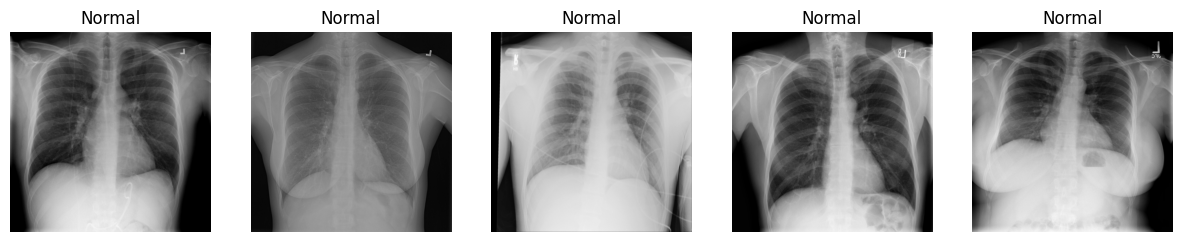

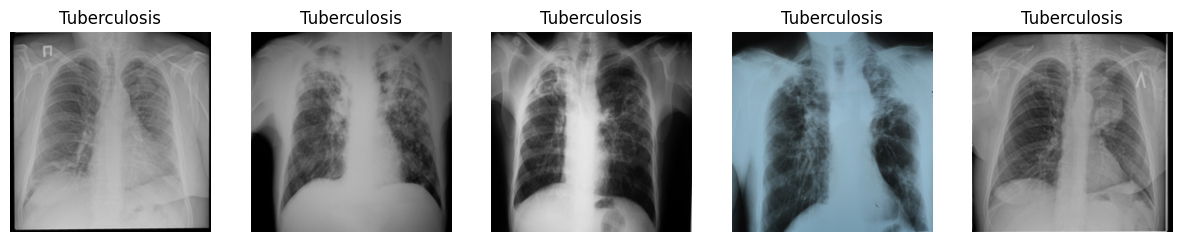

In [5]:
print("Number of TB images:", len(os.listdir(TBpath)))
print("Number of Normal images:", len(os.listdir(Normalpath)))

def show_examples(class_path, title, n=5):
    fig, axes = plt.subplots(1, n, figsize=(15,5))
    for i, fname in enumerate(os.listdir(class_path)[:n]):
        img = cv2.imread(os.path.join(class_path, fname))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(title)
    plt.show()

show_examples(Normalpath, "Normal")
show_examples(TBpath, "Tuberculosis")

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    horizontal_flip=True,
    zoom_range=0.1
)

train_data = train_datagen.flow_from_directory(
    base_path,
    target_size=(224,224),
    class_mode='binary',
    batch_size=32,
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    base_path,
    target_size=(224,224),
    class_mode='binary',
    batch_size=32,
    subset='validation'
)

Found 3570 images belonging to 2 classes.
Found 630 images belonging to 2 classes.


## Model Choice

For the baseline model, we use a simple Convolutional Neural Network (CNN) with one convolutional block and a dense output layer.

This model was chosen because:
- CNNs are well-suited for image classification tasks like detecting Tuberculosis from chest X-rays.
- A small architecture allows fast training and testing.
- It provides a solid benchmark against which more complex architectures (like transfer learning with Inception or ResNet) can be compared.


## Feature Selection



## Implementation

[Implement your baseline model here.]



In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

I0000 00:00:1750111323.088690      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750111323.089430      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(train_data, validation_data=val_data, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1750111357.362538     119 service.cc:148] XLA service 0x7fcd8c0055f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750111357.363633     119 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750111357.363655     119 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750111357.744324     119 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/112 ━━━━━━━━━━━━━━━━━━━━ 15:47 9s/step - accuracy: 0.5312 - loss: 0.6760

I0000 00:00:1750111362.857839     119 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


112/112 ━━━━━━━━━━━━━━━━━━━━ 95s 778ms/step - accuracy: 0.8400 - loss: 0.4236 - val_accuracy: 0.9159 - val_loss: 0.2298
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 70s 625ms/step - accuracy: 0.9037 - loss: 0.2351 - val_accuracy: 0.8603 - val_loss: 0.2288
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 69s 613ms/step - accuracy: 0.9335 - loss: 0.1662 - val_accuracy: 0.8746 - val_loss: 0.2197
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 69s 616ms/step - accuracy: 0.9432 - loss: 0.1289 - val_accuracy: 0.9270 - val_loss: 0.1686
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 69s 616ms/step - accuracy: 0.9489 - loss: 0.1192 - val_accuracy: 0.9444 - val_loss: 0.1562
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 69s 621ms/step - accuracy: 0.9554 - loss: 0.1174 - val_accuracy: 0.8651 - val_loss: 0.2305
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 69s 615ms/step - accuracy: 0.9592 - loss: 0.0972 - val_accuracy: 0.9175 - val_loss: 0.1666
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 69s 620ms/step - accuracy: 0.9638 - loss: 0.0882 - val

## Evaluation

[Clearly state what metrics you will use to evaluate the model's performance. These metrics will serve as a starting point for evaluating more complex models later on.]



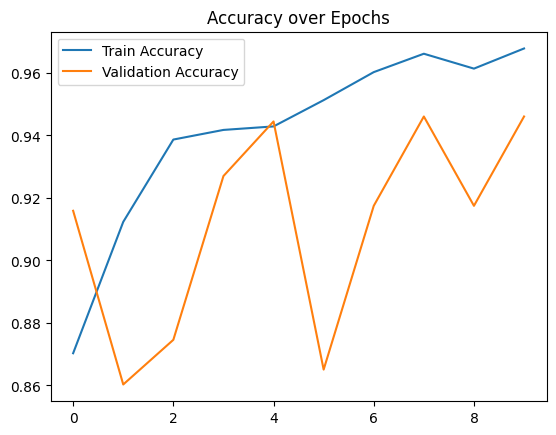

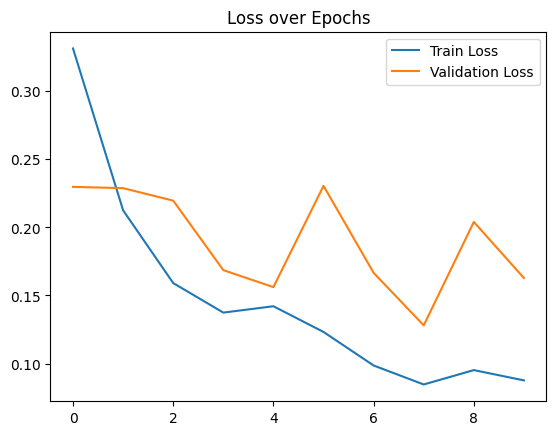

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 501ms/step


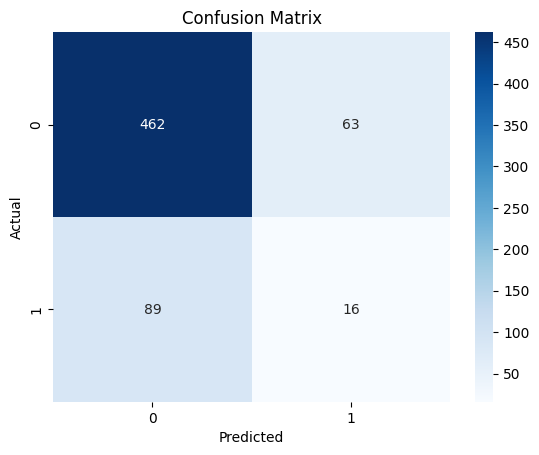

Classification Report:
               precision    recall  f1-score   support

      Normal       0.84      0.88      0.86       525
          TB       0.20      0.15      0.17       105

    accuracy                           0.76       630
   macro avg       0.52      0.52      0.52       630
weighted avg       0.73      0.76      0.74       630



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
val_data.reset()
preds = model.predict(val_data, verbose=1)
y_pred = (preds > 0.5).astype(int)
y_true = val_data.classes

conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=["Normal", "TB"]))